<a href="https://colab.research.google.com/github/hellog2n/Example-Tensorflow-Python/blob/main/PCA%20Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 로드

In [153]:
# -*- coding: utf-8 -*-
import matplotlib.pylab as plt
import numpy as np
%matplotlib inline

In [ ]:
X = [[0.2,5.6,3.56],
     [0.45,5.89,2.4],
     [0.33,6.37,1.95],
     [0.54,7.9,1.32],
     [0.77,7.87,0.98]]
X = np.array(X)
f_value = X

In [6]:
!gdown --id 1DxEIW2-GHR_i9d4WnJOw_yPLszRRU0FW --output f_value.txt # edited by Haneol Lee

Downloading...
From: https://drive.google.com/uc?id=1DxEIW2-GHR_i9d4WnJOw_yPLszRRU0FW
To: /content/f_value.txt
100% 190k/190k [00:00<00:00, 55.5MB/s]


In [154]:
f_value = np.loadtxt("f_value.txt", delimiter=",")
X = f_value

In [ ]:
print(f_value.shape)

(10000, 2)


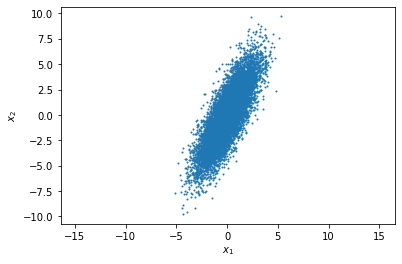

In [155]:
# 데이터 흩뿌리기
plt.scatter(f_value[:, 0], f_value[:, 1], s=1)
plt.axis("equal")
# plt.xlim(-10, 10)
# plt.ylim(-10, 10)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

# 데이터의 차원을 Reduction 해봅시다.

In [156]:
import pandas as pd
import numpy as np

# Data Normalize

데이터를 mean centring 하는 과정을 거칩니다.
(데이터를 정규화하면 데이터의 covariance나 correlation은 같게 나온다고 한다.)

In [ ]:
norm_X = X - X.mean(axis=0)
norm_X = norm_X/X.std(axis=0)

# 작성한 PCA 코드
---
(1) mean centring을 한다. 

In [139]:
def PCAFunction(X, dim = None):
  # mean Centering
  norm_X = X - X.mean(axis=0)
  #norm_X = norm_X/X.std(axis=0)
  # 공분산을 구한다.
  cov_mat_T = np.cov(norm_X.T)
  # 공분산의 고유벡터와 고유값을 구한다.
  eigval, eigvec = np.linalg.eig(cov_mat_T)

  index = eigval.argsort()[::-1][:]
  # sorting
  eigvec = eigvec[:, index]
  # sorting
  eigval= eigval[index]
  if dim == None:
    dim = 2 # default dim = 2
  eigvec = eigvec[:, :dim]
  pca = np.dot(eigvec.T, norm_X.T).T
  return pca

# 라이브러리 PCA 코드

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # 주성분을 몇개로 할지 결정
printcipalComponents = pca.fit_transform(norm_X)
principalDf = pd.DataFrame(data=printcipalComponents, columns = ['principal component1', 'principal component2'])

In [ ]:
print(principalDf)

   principal component1  principal component2  principal component3
0              1.874044              0.355532             -0.017901
1              0.851514             -0.310226             -0.076201
2              0.214821             -0.298329              0.128201
3             -1.352108              0.270306              0.070871
4             -1.588272             -0.017282             -0.104969


In [ ]:
pca = PCAFunction(X, 2)

In [ ]:
sum = []
eigval_n = len(eigval)
for i in range(eigval_n):
  z = 0
  for j in range(eigval_n):
    z = z + eigvec[:, max_list[i]][j] * norm_X[:, j]
  sum.append(z)
pca = np.vstack(sum).T

# Visualize

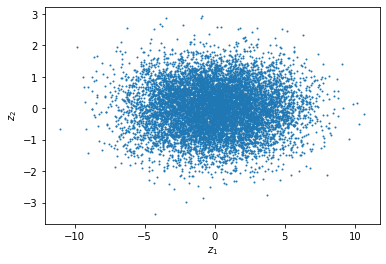

In [ ]:
plt.scatter(pca[:, 0], pca[:, 1], s=1)
# plt.xlim(-10, 10)
# plt.ylim(-10, 10)
plt.xlabel("$z_1$")
plt.ylabel("$z_2$")
plt.show()

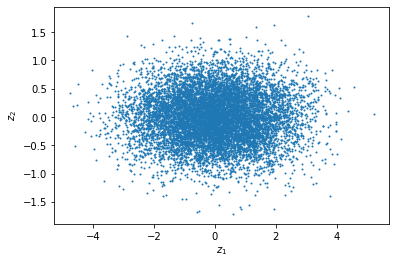

In [ ]:
scatter_plot=principalDf.plot.scatter(x='principal component1',y='principal component2', s=1)
scatter_plot.plot()
plt.xlabel("$z_1$")
plt.ylabel("$z_2$")
plt.show()

# PCA란?


## 1-(1)

In [ ]:
def normalize(X):
  norm_X = X - X.mean(axis=0)
  #norm_X = norm_X/X.std(axis=0)
  return norm_X

In [ ]:
from sklearn.decomposition import PCA
pca3 = PCA(n_components=1) # 주성분을 몇개로 할지 결정
arr1 = normalize(arr1)
printcipalComponents3 = pca3.fit_transform(arr1)
principalDf3 = pd.DataFrame(data=printcipalComponents3, columns = ['principal component1'])

In [ ]:
pca4 = PCA(n_components=1) # 주성분을 몇개로 할지 결정
arr2 = normalize(arr2)
printcipalComponents4 = pca4.fit_transform(arr2)
principalDf4 = pd.DataFrame(data=printcipalComponents4, columns = ['principal component1'])

## 2-(1)

In [137]:
mu, sigma = 0, 1 # mean and standard deviation
sample_n = 10000
eps = np.random.normal(mu, sigma, sample_n)
X = np.random.uniform(low=0.0, high=4.0, size=sample_n)

Y1 = 4*X + eps
Y2 = np.power(X, 2) + eps


In [ ]:
arr1 = np.squeeze(np.dstack([X, Y1]))
arr2 = np.squeeze(np.dstack([X, Y2]))
pca2_1 = PCAFunction(arr1, 1)
pca2_2 = PCAFunction(arr2, 1)

In [ ]:
scatter_plot=principalDf3.plot.scatter(x='principal component1',y='principal component2', s=1)
scatter_plot.plot()
plt.xlabel("$z_1$")
plt.ylabel("$z_2$")
plt.show()

#2 - 1

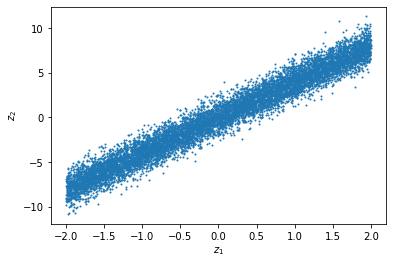

In [ ]:
plt.scatter(arr1[:, 0], arr1[:, 1], s=1)
plt.xlabel("$z_1$")
plt.ylabel("$z_2$")
plt.show()

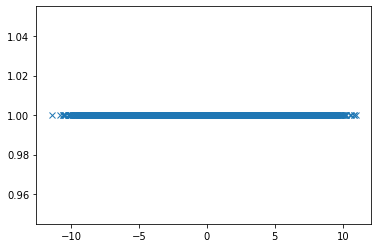

In [ ]:
plt.plot(pca2_1, len(pca2_1) * [1], "x")
plt.show()

# 2-2

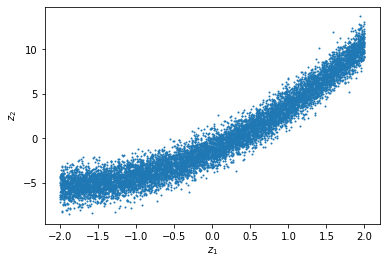

In [ ]:
plt.scatter(arr2[:, 0], arr2[:, 1], s=1)
plt.xlabel("$z_1$")
plt.ylabel("$z_2$")
plt.show()

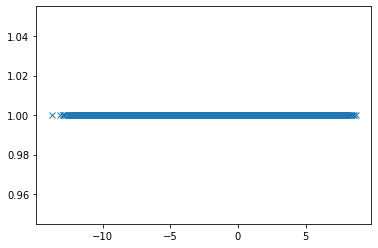

In [ ]:
plt.plot(pca2_2, len(pca2_2) * [1], "x")
plt.show()

## (3) Autoencoder Linear PCA


In [140]:
import math
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

데이터 로드하기

In [122]:
f_value = np.loadtxt("f_value.txt", delimiter=",")
X = f_value

In [147]:
X = arr1

정규화 하기

In [148]:
X = (X - X.mean()) / X.std()

# Encoder Decoder 설정

In [145]:
class Autoencoder(nn.Module):
  def __init__(self):
    super().__init__()
    self.encoder = nn.Linear(2, 1)
    self.decoder = nn.Linear(1, 2)

  def forward(self, x):
    out = self.encoder(x)
    out = self.decoder(out)
    return out

  def get_codes(self, x):
    return self.encoder(x)
  

In [146]:
model = Autoencoder()
loss_func = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Train Setting

In [149]:
def train(model, loss, optimizer, num_epochs):
  train_loss_arr = []
  global X
  X = torch.Tensor(X)

  for epoch in range(num_epochs):
    epoch_loss = 0.
    train_loss_arr = []

    for x in X:
      optimizer.zero_grad()
      output = model.forward(x)
      loss = loss_func(output, x)
      train_loss_arr.append(loss.data.item())
      loss.backward()
      optimizer.step()
    
    #if epoch % 5 == 0:
    print("epoch {} loss: {:.10f}".format(epoch + 1, np.mean(train_loss_arr)))

In [90]:
# Batch Setting
def batch_train(model, loss, optimizer, num_epochs, batch_size):
  train_loss_arr = []
  global X
  X = torch.Tensor(X)

  for epoch in range(num_epochs):
    # X is a torch Variable
    permutation = torch.randperm(X.size()[0])

    epoch_loss = 0.
    train_loss_arr = []
    for x in range(0,X.size()[0], batch_size):
    #for x in f_value: 
      optimizer.zero_grad()

      indices = permutation[x:x+batch_size]
      batch_x = X[indices]
      output = model.forward(batch_x)
      loss = loss_func(output, batch_x)
      train_loss_arr.append(loss.data.item())
      loss.backward()
      optimizer.step()
    
    if epoch > 10 and epoch % 10 == 0 and epoch <= 100:
      print("epoch {} loss: {:.10f}".format(epoch + 1, np.mean(train_loss_arr)))
    elif epoch > 100 and epoch % 1000 == 0:
      print("epoch {} loss: {:.10f}".format(epoch + 1, np.mean(train_loss_arr)))

# Train

In [150]:
train(model, loss_func, optimizer, 10)

epoch 1 loss: 0.0134787415
epoch 2 loss: 0.0015889571
epoch 3 loss: 0.0015138132
epoch 4 loss: 0.0014685790
epoch 5 loss: 0.0014402979
epoch 6 loss: 0.0014221716
epoch 7 loss: 0.0014103571
epoch 8 loss: 0.0014025667
epoch 9 loss: 0.0013973874
epoch 10 loss: 0.0013939234


In [134]:
state = X
value = model.get_codes(state.float())
value = value.detach().numpy()

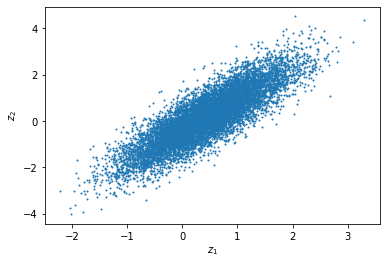

In [135]:
plt.scatter(value[:, 0], value[:, 1], s=1)
plt.xlabel("$z_1$")
plt.ylabel("$z_2$")
plt.show()

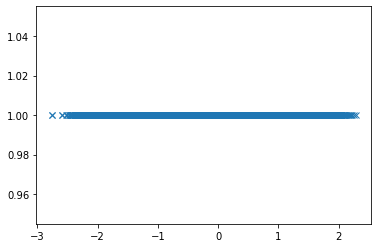

In [152]:
state = X
value = model.get_codes(state.float())
value = value.detach().numpy()
plt.plot(value, len(value) * [1], "x")
plt.show()